GoKart, a regional service delivery service company provides different types of package delivery service. An analyst wants to estimate the cost of shipping a package as function of cargo type.

1) Estimate the appropriate multiple linear regression equation to predict the cost of shipping a package<br>
2) Provide interpretation for the regression coefficients.<br>
3) Which cargo type is the costliest? Which one is least costly?<br>
4) How well does the regression fit the sample data? How can the goodness of fitness be improved?<br>
5) Predict the cost of shipping a package with semi-fragile cargo

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

import statsmodels.api as sm

In [2]:
# load data
df = pd.read_csv('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Regression-Models-main/MLR_Q11_CourierService.csv')
df

,Shipment,CargType,CosoShipment
0,1,Semifragile,84.0
1,2,Durable,24.0
2,3,Fragile,165.6
3,4,Fragile,133.2
4,5,Semifragile,120.0
5,6,Fragile,206.4
6,7,Semifragile,138.0
7,8,Semifragile,78.0
8,9,Semifragile,102.0
9,10,Durable,25.2


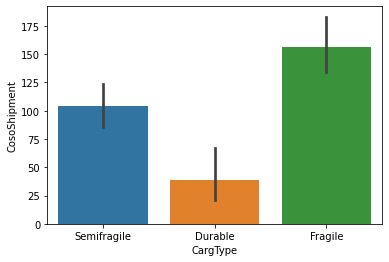

In [3]:
# lets visualize the data
sns.barplot(data=df, x='CargType', y='CosoShipment')
plt.show()

In [4]:
# lets encode the categorical variable CargType

df_encoded = pd.get_dummies(df, columns=['CargType'])
df_encoded

,Shipment,CosoShipment,CargType_Durable,CargType_Fragile,CargType_Semifragile
0,1,84.0,0,0,1
1,2,24.0,1,0,0
2,3,165.6,0,1,0
3,4,133.2,0,1,0
4,5,120.0,0,0,1
5,6,206.4,0,1,0
6,7,138.0,0,0,1
7,8,78.0,0,0,1
8,9,102.0,0,0,1
9,10,25.2,1,0,0


### 1) Estimate the appropriate multiple linear regression equation to predict the cost of shipping a package

In [5]:
# lets train the model
Y = df_encoded['CosoShipment']
X = df_encoded[['CargType_Durable', 'CargType_Fragile', 'CargType_Semifragile']]

X = sm.add_constant(X)
reg_model = sm.OLS(Y,X).fit()
reg_model.summary()

C:\Users\Karthik.Iyer\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CosoShipment   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     20.61
Date:                Mon, 16 May 2022   Prob (F-statistic):           0.000132
Time:                        08:20:09   Log-Likelihood:                -70.043
No. Observations:                  15   AIC:                             146.1
Df Residuals:                      12   BIC:                             148.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   74.8800      5.587     13.402      0.000      62.706      87.054
CargType_Durable       -35.7600     10.699     -3.342      0.006     -59.071     -12.449
CargType_Fragile        81.1200     10.699      7.582      0.000      57.809     104.431
CargType_Semifragile    29.5200     10.699      2.759      0.017       6.209      52.831
==============================================================================
Omnibus:                        2.879   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.128
Skew:                           0.879   Prob(JB):                        0.345
Kurtosis:                       2.442   Cond. No.                     3.93e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.3e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Regression equation:**<br>
CosoShipment = 74.88 - 35.76 * CargType_Durable + 81.12 * CargType_Fragile + 29.52 * CargType_Semifragile

### 2) Provide interpretation for the regression coefficients.

The regression coefficient for Fragile CargoType (CargType_Fragile) is the highest (81.12) indicating strong influence on Cost of Shipping, followed by Semifragile Cargo Type (CargType_Semifragile). Durable Cargo Type seems to have the lowest influence on Cost of Shipping.

### 3) Which cargo type is the costliest? Which one is least costly?

From regression coefficients we can infer that Fragile Cargo Type can be costliest, while Durable Cargo Type being least costly.

### 4) How well does the regression fit the sample data? How can the goodness of fitness be improved?

R-Squared value of 0.774 indicate that 77.4% of variation in Cost of Shipping are explained by the variations in Cargo Type

The data considered is only a sample for 15 onbservations. We can look at increaing the sample size and training the model again to check the R-Squared value

### 5) Predict the cost of shipping a package with semi-fragile cargo

**Regression equation:**<br>
CosoShipment = 74.88 - 35.76 * CargType_Durable + 81.12 * CargType_Fragile + 29.52 * CargType_Semifragile

CosoShipment = 74.88 - 35.76 * 0 + 81.12 * 0 + 29.52 * 1 (since we need to predict for semifragile, the coeeficients for other cargo types are set to 0)

In [6]:
CosoShipment = 74.88 - 35.76*0 + 81.12*0 + 29.52*1
CosoShipment

104.39999999999999